In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from itertools import product

In [2]:
# ============================
# Membaca dataset dari file CSV
# ============================
file_path = 'Dataset/heart.csv'
data = pd.read_csv(file_path)

In [3]:
# ============================
# Eksplorasi Data Awal (EDA)
# ============================
# Menampilkan informasi dataset
print("Informasi Dataset:")
print(data.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [4]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(data.describe())


Statistik Deskriptif:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     

In [5]:
# Mengecek nilai NaN pada target
nan_count = data['target'].isna().sum()
print(f"\nJumlah nilai NaN pada target: {nan_count}")


Jumlah nilai NaN pada target: 0


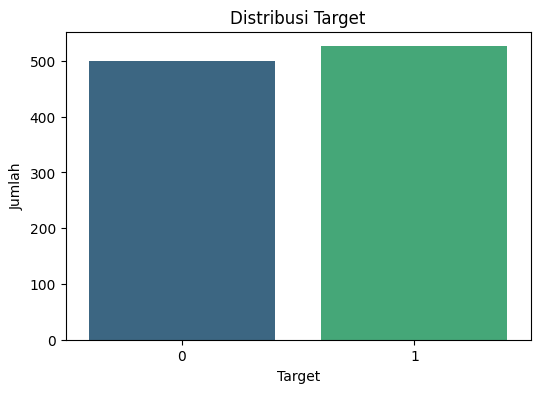

In [6]:
# Mengecek distribusi target
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data, palette='viridis')
plt.title('Distribusi Target')
plt.xlabel('Target')
plt.ylabel('Jumlah')
plt.savefig("Task11Heart/target_distribution.png")
plt.show()


In [7]:
# Mengecek nilai unik pada target
unique_values = data['target'].unique()
print(f"\nNilai unik pada target: {unique_values}")


Nilai unik pada target: [0 1]


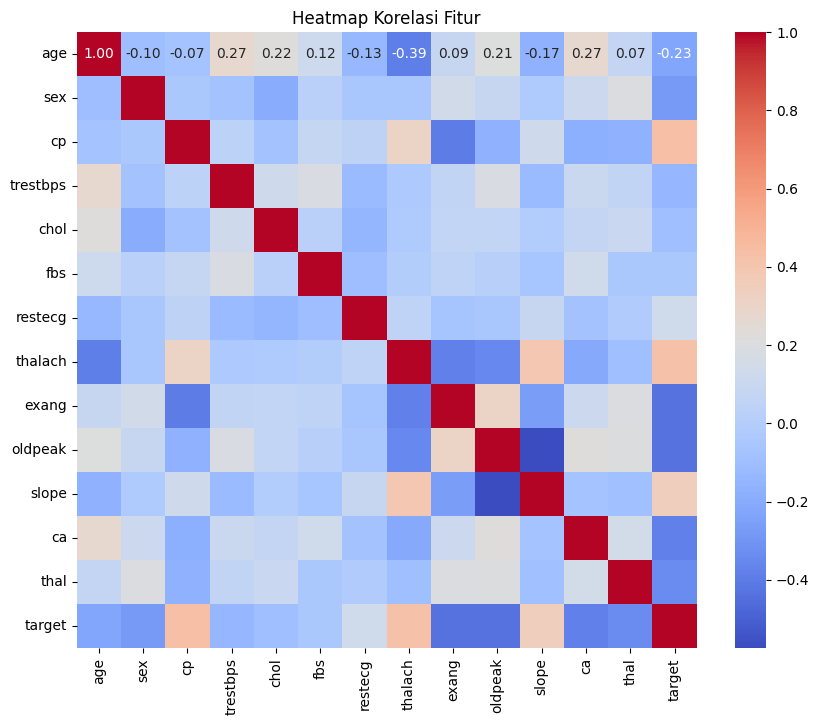

In [8]:
# Heatmap korelasi fitur
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Heatmap Korelasi Fitur')
plt.savefig("Task11Heart/correlation_heatmap.png")
plt.show()

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


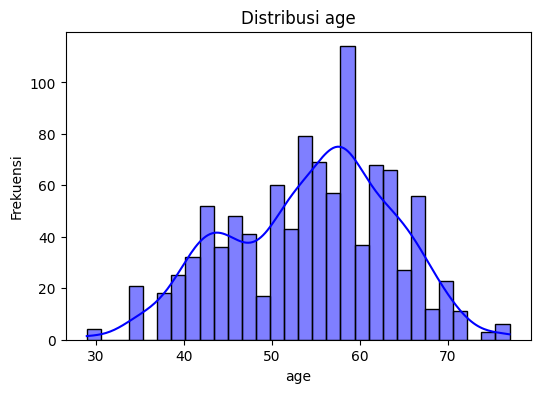

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


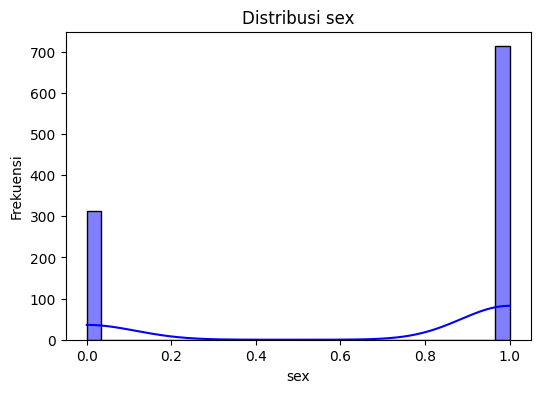

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


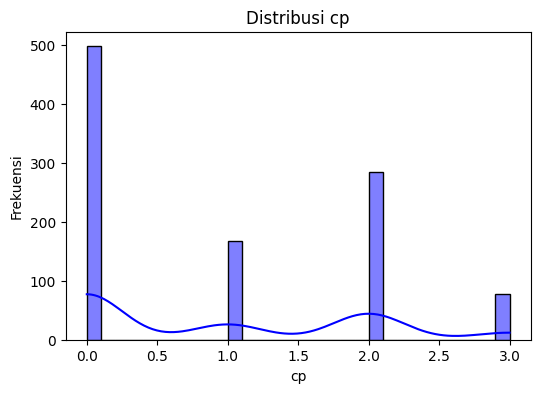

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


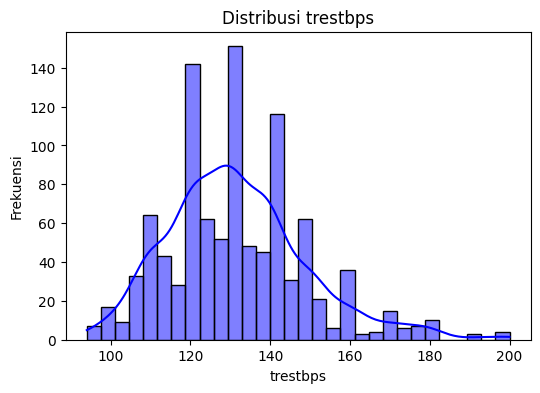

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


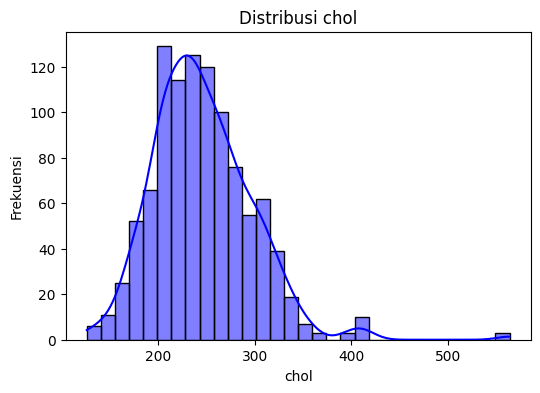

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


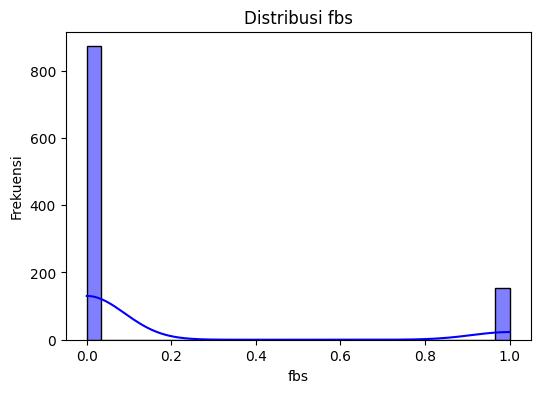

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


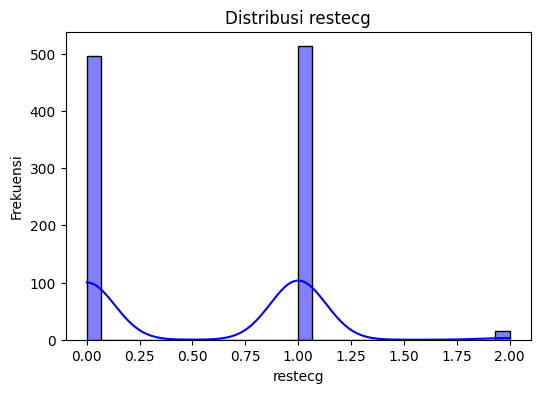

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


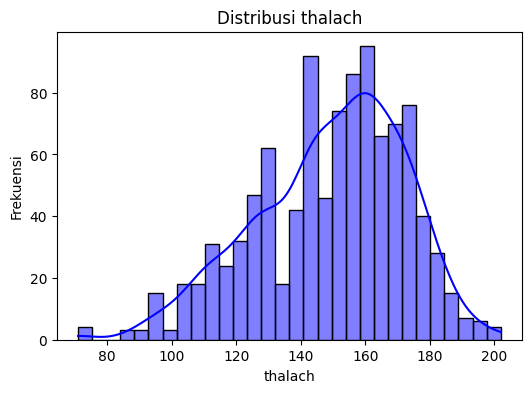

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


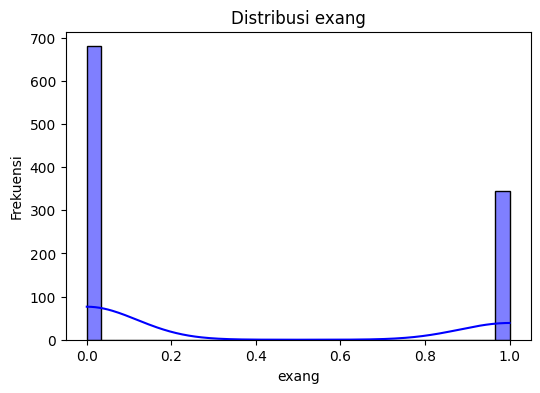

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


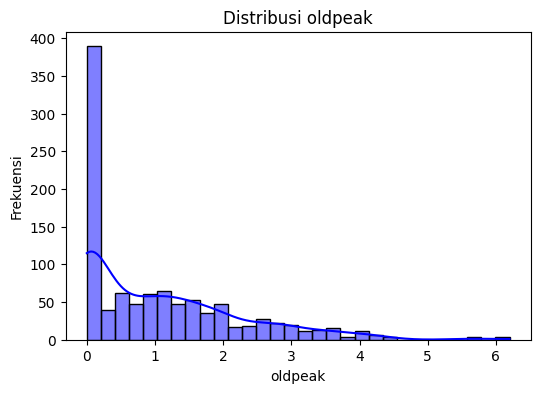

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


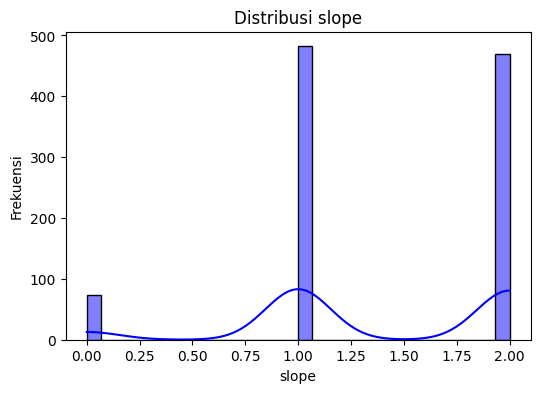

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


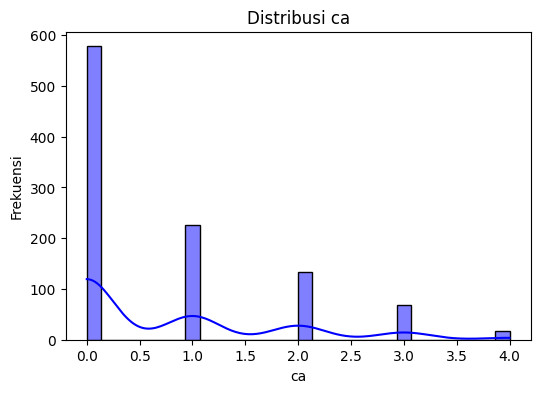

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


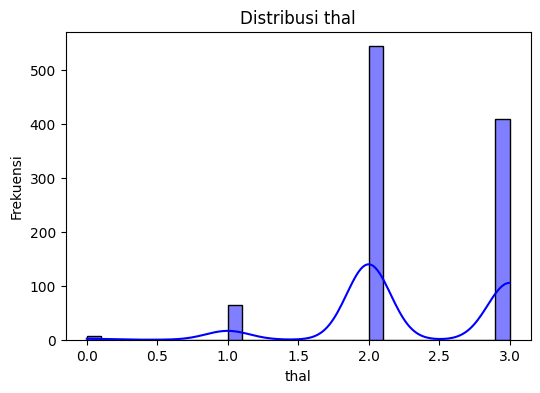

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


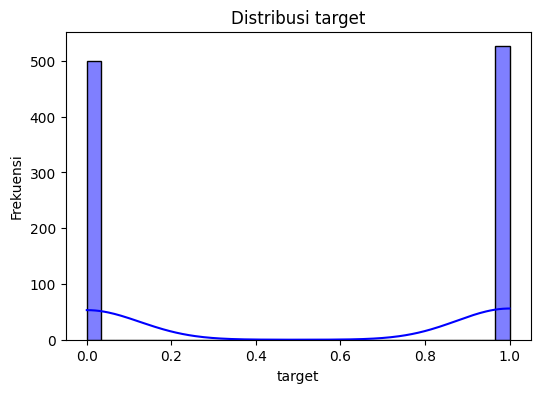

In [9]:
# Distribusi fitur numerik
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.savefig(f"Task11Heart/{feature}_distribution.png")
    plt.show()


In [10]:
# ============================
# Pra-pemrosesan Data
# ============================
# Memisahkan fitur (X) dan label (y)
X = data.drop(columns=['target'])
y = data['target']

# Membagi data menjadi data latih dan uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi data ke tensor PyTorch
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Membuat DataLoader untuk batching data
# Fungsi ini akan digunakan dalam eksperimen batch size

def create_data_loader(batch_size):
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader


In [11]:
# ============================
# Definisi Model MLP
# ============================
def create_mlp(input_size, hidden_layers, activation_fn):
    layers = []
    current_size = input_size

    # Menambahkan hidden layers
    for hidden_size in hidden_layers:
        layers.append(nn.Linear(current_size, hidden_size))
        layers.append(activation_fn())
        current_size = hidden_size

    # Layer output
    layers.append(nn.Linear(current_size, 2))  # Output 2 kelas (0 dan 1)

    return nn.Sequential(*layers)

In [12]:
# ============================
# Fungsi Pelatihan dan Evaluasi Model
# ============================
def train_and_evaluate(model, train_loader, test_loader, epochs, learning_rate):
    # Definisi loss function dan optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Pelatihan model
    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()

    # Evaluasi model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            _, predicted = torch.max(y_pred, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    accuracy = correct / total
    return accuracy


In [13]:
# ============================
# Eksperimen Hyperparameter
# ============================
# Konfigurasi parameter untuk eksperimen
hidden_layer_configs = [
    [4], [8], [16], [32], [64], [128],
    [4, 8], [8, 16], [16, 32], [64, 128],
    [4, 8, 16], [8, 16, 32], [16, 32, 128]
]
activation_functions = [nn.Identity, nn.Sigmoid, nn.ReLU, nn.Softmax, nn.Tanh]
epoch_values = [1, 10, 25, 50, 100, 250]
learning_rates = [10, 1, 0.1, 0.01, 0.001, 0.0001]
batch_sizes = [16, 32, 64, 128, 256, 512]

# Kombinasi semua parameter
experiments = list(product(hidden_layer_configs, activation_functions, epoch_values, learning_rates, batch_sizes))

# Menyimpan hasil
results = []

# Loop untuk menjalankan eksperimen
for i, (hidden_layers, activation_fn, epochs, learning_rate, batch_size) in enumerate(experiments):
    try:
        # Membuat DataLoader
        train_loader, test_loader = create_data_loader(batch_size)
        
        # Membuat model
        input_size = X_train_tensor.shape[1]
        model = create_mlp(input_size, hidden_layers, activation_fn)
        
        # Melatih dan mengevaluasi model
        accuracy = train_and_evaluate(model, train_loader, test_loader, epochs, learning_rate)
        
        # Menyimpan hasil eksperimen
        results.append({
            "hidden_layers": hidden_layers,
            "activation_function": activation_fn.__name__,
            "epochs": epochs,
            "learning_rate": learning_rate,
            "batch_size": batch_size,
            "accuracy": accuracy
        })
        
        # Log kemajuan
        if i % 10 == 0:  # Setiap 10 eksperimen
            print(f"Progress: {i}/{len(experiments)} experiments completed.")
    
    except Exception as e:
        # Menangani error saat eksperimen
        results.append({
            "hidden_layers": hidden_layers,
            "activation_function": activation_fn.__name__,
            "epochs": epochs,
            "learning_rate": learning_rate,
            "batch_size": batch_size,
            "accuracy": None,
            "error": str(e)
        })

# Menyimpan hasil dalam DataFrame untuk analisis lebih lanjut
results_df = pd.DataFrame(results)
results_df.to_csv("Task11Heart/experiment_results.csv", index=False)

Progress: 0/14040 experiments completed.
Progress: 10/14040 experiments completed.
Progress: 20/14040 experiments completed.
Progress: 30/14040 experiments completed.
Progress: 40/14040 experiments completed.
Progress: 50/14040 experiments completed.
Progress: 60/14040 experiments completed.
Progress: 70/14040 experiments completed.
Progress: 80/14040 experiments completed.
Progress: 90/14040 experiments completed.
Progress: 100/14040 experiments completed.
Progress: 110/14040 experiments completed.
Progress: 120/14040 experiments completed.
Progress: 130/14040 experiments completed.
Progress: 140/14040 experiments completed.
Progress: 150/14040 experiments completed.
Progress: 160/14040 experiments completed.
Progress: 170/14040 experiments completed.
Progress: 180/14040 experiments completed.
Progress: 190/14040 experiments completed.
Progress: 200/14040 experiments completed.
Progress: 210/14040 experiments completed.
Progress: 220/14040 experiments completed.
Progress: 230/14040 ex

c:\Users\LENOVO\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Progress: 650/14040 experiments completed.
Progress: 660/14040 experiments completed.
Progress: 670/14040 experiments completed.
Progress: 680/14040 experiments completed.
Progress: 690/14040 experiments completed.
Progress: 700/14040 experiments completed.
Progress: 710/14040 experiments completed.
Progress: 720/14040 experiments completed.
Progress: 730/14040 experiments completed.
Progress: 740/14040 experiments completed.
Progress: 750/14040 experiments completed.
Progress: 760/14040 experiments completed.
Progress: 770/14040 experiments completed.
Progress: 780/14040 experiments completed.
Progress: 790/14040 experiments completed.
Progress: 800/14040 experiments completed.
Progress: 810/14040 experiments completed.
Progress: 820/14040 experiments completed.
Progress: 830/14040 experiments completed.
Progress: 840/14040 experiments completed.
Progress: 850/14040 experiments completed.
Progress: 860/14040 experiments completed.
Progress: 870/14040 experiments completed.
Progress: 8

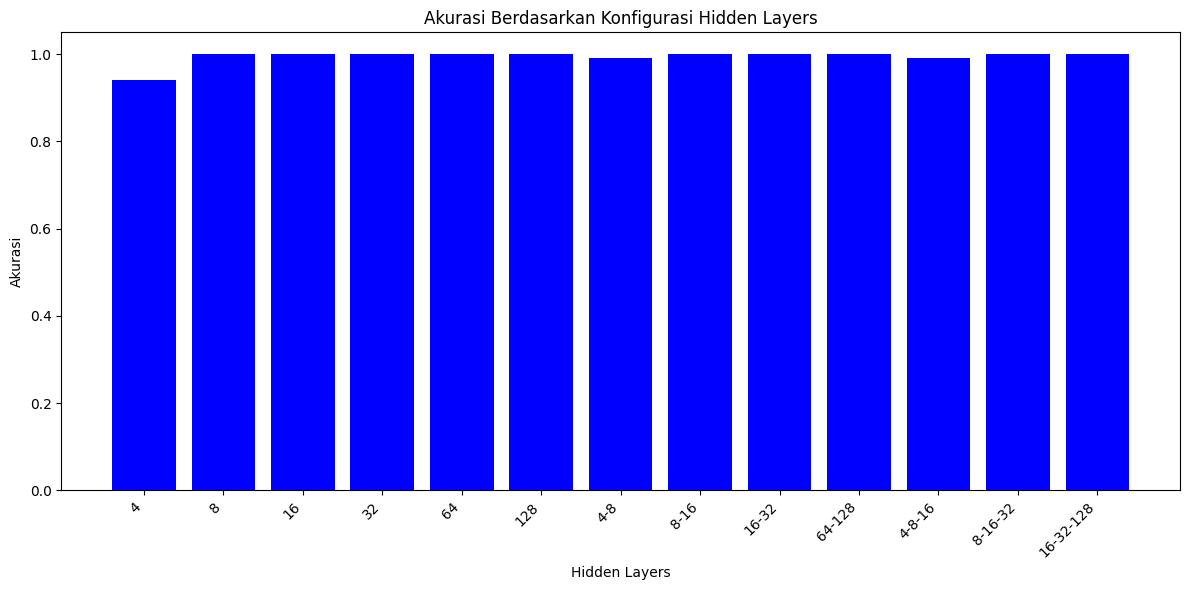

In [14]:
# ============================
# Visualisasi Hasil
# ============================
# Menampilkan hasil akurasi berdasarkan jumlah hidden layers
hidden_layer_labels = ["-".join(map(str, hl)) for hl in results_df["hidden_layers"]]
plt.figure(figsize=(12, 6))
plt.bar(hidden_layer_labels, results_df["accuracy"], color='blue')
plt.title("Akurasi Berdasarkan Konfigurasi Hidden Layers")
plt.xlabel("Hidden Layers")
plt.ylabel("Akurasi")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Task11Heart/hidden_layer_accuracy.png")
plt.show()

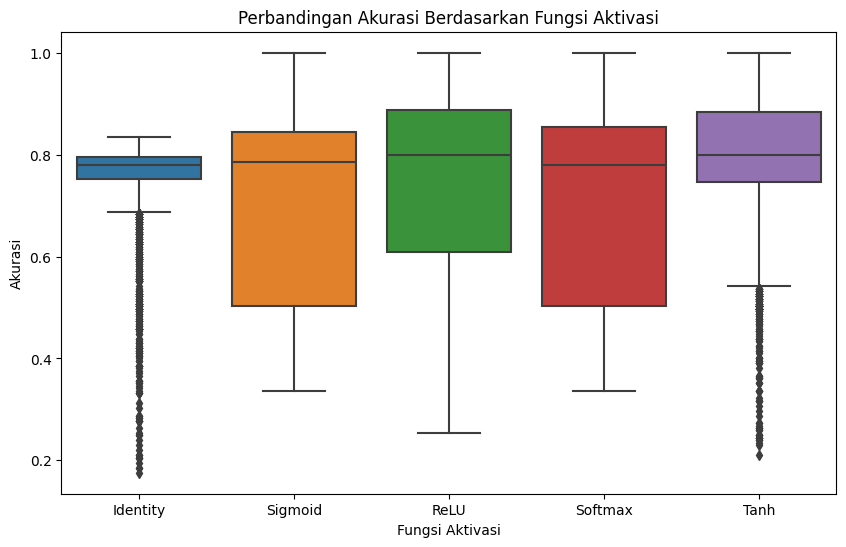

In [15]:
# Visualisasi perbandingan akurasi berdasarkan parameter
plt.figure(figsize=(10, 6))
sns.boxplot(x='activation_function', y='accuracy', data=results_df)
plt.title('Perbandingan Akurasi Berdasarkan Fungsi Aktivasi')
plt.xlabel('Fungsi Aktivasi')
plt.ylabel('Akurasi')
plt.savefig("Task11Heart/activation_function_accuracy.png")
plt.show()

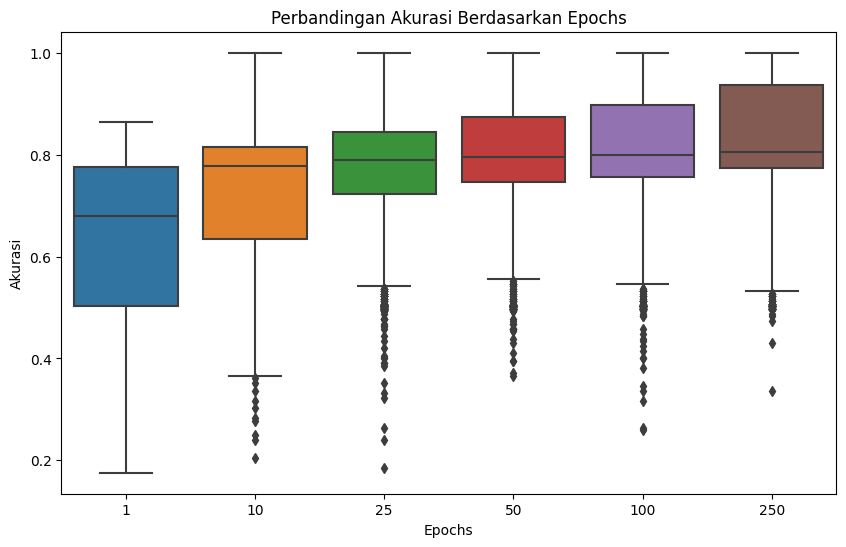

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='epochs', y='accuracy', data=results_df)
plt.title('Perbandingan Akurasi Berdasarkan Epochs')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.savefig("Task11Heart/epochs_accuracy.png")
plt.show()

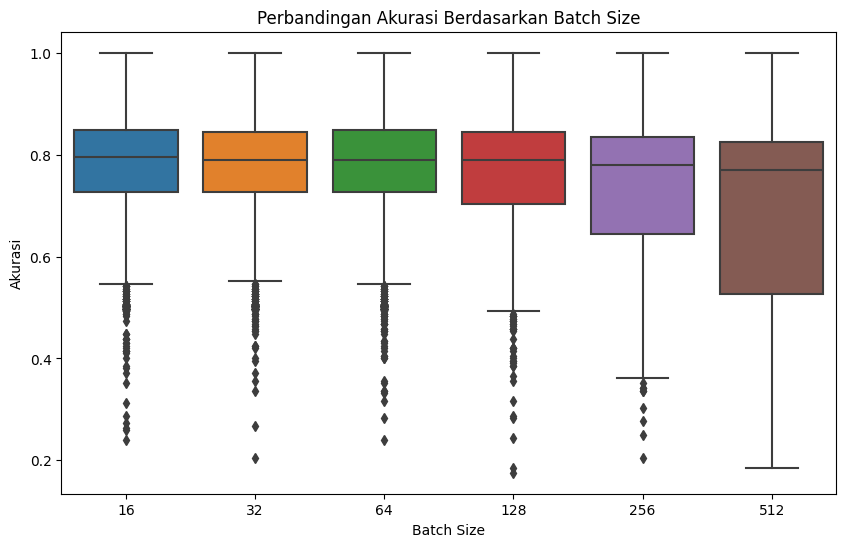

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='batch_size', y='accuracy', data=results_df)
plt.title('Perbandingan Akurasi Berdasarkan Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Akurasi')
plt.savefig("Task11Heart/batch_size_accuracy.png")
plt.show()

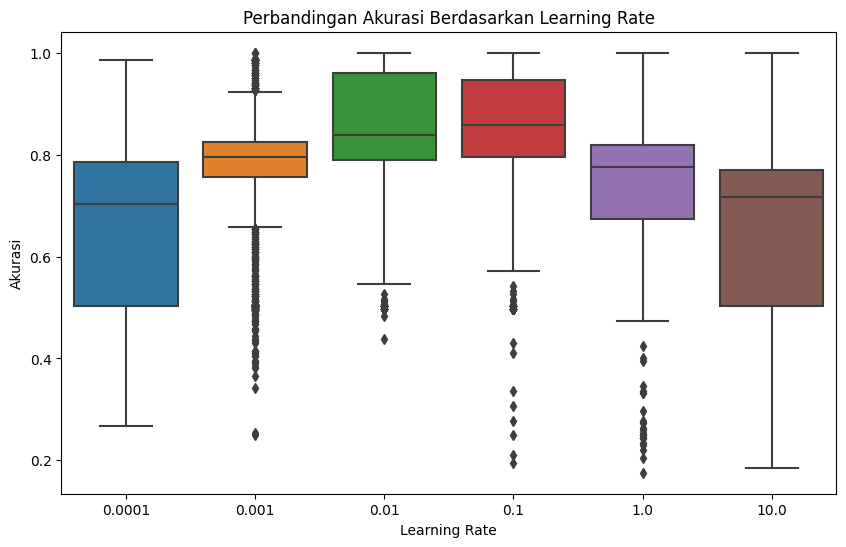

Hasil eksperimen disimpan ke experiment_results.csv dan visualisasi telah dibuat.


In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='learning_rate', y='accuracy', data=results_df)
plt.title('Perbandingan Akurasi Berdasarkan Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Akurasi')
plt.savefig("Task11Heart/learning_rate_accuracy.png")
plt.show()

print("Hasil eksperimen disimpan ke experiment_results.csv dan visualisasi telah dibuat.")